In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [2]:
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import np_utils

print()

In [3]:
temp_dir = './temp/'
if not os.path.exists(temp_dir):
    os.makedirs(temp_dir)
    print('Create directory:', temp_dir, '\n')

def savefig(fig, file_name):
    fig.savefig(temp_dir + file_name + '.png')
    print('Image file saved:', temp_dir + file_name + '.png')

In [4]:
print('Loading data...')
from keras.datasets import mnist
(x_train_image, y_train_label), (x_test_image, y_test_label) = mnist.load_data()
print('Done')
print('Inputs:', str(x_train_image[0].shape), 'images.')
print('    x_train_image:', len(x_train_image))
print('    x_test_image :', len(x_test_image))
print('Outputs: labels.')
print('    y_train_label:', len(y_train_label))
print('    y_test_label :', len(y_test_label), '\n')

Loading data...
Done
Inputs: (28, 28) images.
    x_train_image: 60000
    x_test_image : 10000
Outputs: labels.
    y_train_label: 60000
    y_test_label : 10000 



In [5]:
images_per_row = 8
defualt_row_number = 1
max_row_number = 3

def plot_images_labels_prediction(images, labels,
                                  prediction = [],
                                  start_index = 0,
                                  num = images_per_row * defualt_row_number):
    plt.clf()
    fig = plt.gcf()
    fig.set_size_inches(images_per_row * 2, images_per_row * 1.5)
    if num > images_per_row * max_row_number:
        raise ValueError("The maximum data number to print is " + str(images_per_row * max_row_number) + ".")
    for i in range(0, num):
        ax = plt.subplot(max_row_number, images_per_row, 1 + i)
        ax.imshow(images[start_index], cmap='binary')
        title = "i = " + str(start_index) + ", y = " + str(labels[start_index])
        if len(prediction) > 0:
            title += ", predict = " + str(prediction[start_index])
        ax.set_title(title, fontsize = 8)
        ax.set_xticks([])
        ax.set_yticks([])
        start_index += 1
#   plt.show()
    if len(prediction) <= 0:
        savefig(fig, 'images_train_' + str(start_index - num) + '_' + str(start_index - 1))
    else:
        savefig(fig, 'images_test_' + str(start_index - num) + '_' + str(start_index - 1))

Image file saved: ./temp/images_train_0_7.png



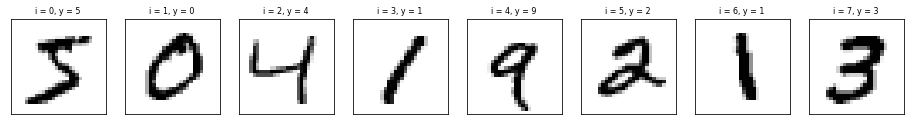

In [6]:
plot_images_labels_prediction(x_train_image, y_train_label)
print()

In [7]:
def to_normalize_input(input_image):
    input_shape = input_image.shape
    if len(input_shape) != 3:
        raise ValueError("The length of the shape should be 3.")
    return input_image.reshape(input_shape[0], input_shape[1] * input_shape[2]).astype('float64') / 255

def to_normalize_output(output_label):
    return np_utils.to_categorical(output_label)

In [8]:
x_train = to_normalize_input(x_train_image)
x_test  = to_normalize_input(x_test_image)

y_train = to_normalize_output(y_train_label)
y_test  = to_normalize_output(y_test_label)

In [9]:
model = Sequential()
model.add(
    Dense(
        units = 200,
        input_dim = 784,
        activation = 'relu',
        kernel_initializer = 'normal',
        bias_initializer = 'normal'
    )
)
model.add(
    Dense(
        units = 10,
        activation = 'softmax',
        kernel_initializer = 'normal',
        bias_initializer = 'normal'
    )
)

In [10]:
print(model.summary(), '\n')

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 200)               157000    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2010      
Total params: 159,010
Trainable params: 159,010
Non-trainable params: 0
_________________________________________________________________
None 



In [11]:
model.compile(
    optimizer = 'adam',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

In [12]:
train_history = model.fit(
    x = x_train,
    y = y_train,
    batch_size = 200,
    epochs = 20,
    validation_split = 0.2
)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 2s 32us/step - loss: 0.4671 - acc: 0.8754 - val_loss: 0.2293 - val_acc: 0.9354
Epoch 2/20
48000/48000 [==============================] - 1s 27us/step - loss: 0.2029 - acc: 0.9417 - val_loss: 0.1702 - val_acc: 0.9527
Epoch 3/20
48000/48000 [==============================] - 2s 32us/step - loss: 0.1460 - acc: 0.9577 - val_loss: 0.1348 - val_acc: 0.9617
Epoch 4/20
48000/48000 [==============================] - 1s 30us/step - loss: 0.1144 - acc: 0.9677 - val_loss: 0.1184 - val_acc: 0.9650
Epoch 5/20
48000/48000 [==============================] - 1s 28us/step - loss: 0.0925 - acc: 0.9740 - val_loss: 0.1080 - val_acc: 0.9690
Epoch 6/20
48000/48000 [==============================] - 1s 29us/step - loss: 0.0762 - acc: 0.9786 - val_loss: 0.0992 - val_acc: 0.9704
Epoch 7/20
48000/48000 [==============================] - 1s 29us/step - loss: 0.0628 - acc: 0.9829 - val_loss: 0.0906 - val_acc

In [13]:
def show_train_history(train_history, train, validation, title = None):
    plt.clf()
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc = 'upper left')
#   plt.show()
    savefig(plt, 'training_history_' + train)

Image file saved: ./temp/training_history_acc.png


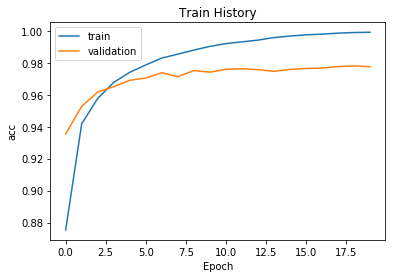

In [14]:
show_train_history(train_history, 'acc', 'val_acc')

Image file saved: ./temp/training_history_loss.png



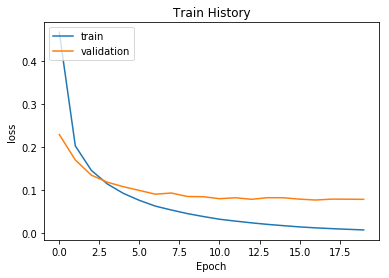

In [15]:
show_train_history(train_history, 'loss', 'val_loss')
print()

In [16]:
print('Evaluating: ')
scores = model.evaluate(x_test, y_test)
print("The loss for test data:", scores[0])
print("The accuracy for test data:", scores[1] * 100, '%\n')

Evaluating: 
10000/10000 [==============================] - 0s 23us/step
The loss for test data: 0.07046400248015416
The accuracy for test data: 97.99 %



In [17]:
print('Predicting: ')
prediction = model.predict_classes(x_test, verbose = 1)
print(pd.crosstab(y_test_label, prediction, colnames=['predict'], rownames=['y']), '\n')

Predicting: 
10000/10000 [==============================] - 0s 19us/step
predict    0     1     2    3    4    5    6     7    8    9
y                                                           
0        971     0     1    0    0    1    2     1    2    2
1          0  1123     4    1    0    0    2     1    4    0
2          4     1  1011    2    1    0    2     5    6    0
3          0     0     3  993    0    4    0     2    5    3
4          0     0     4    1  960    0    3     2    2   10
5          2     1     0    9    1  872    2     1    4    0
6          6     3     2    1    3    3  938     0    2    0
7          0     4     7    4    0    1    0  1005    1    6
8          3     0     4    5    4    3    2     4  945    4
9          1     3     0    8    8    2    0     6    0  981 



In [18]:
print('Data frame for error cases:')
df = pd.DataFrame({'label': y_test_label, 'predict': prediction})
print(df[df.label != df.predict], '\n')

Data frame for error cases:
      label  predict
247       4        2
321       2        7
340       5        3
445       6        0
495       8        2
582       8        2
613       2        8
619       1        8
659       2        1
684       7        3
691       8        4
707       4        9
720       5        8
740       4        9
877       8        5
900       1        3
947       8        9
951       5        4
956       1        2
965       6        0
1003      5        3
1014      6        5
1039      7        2
1112      4        6
1181      6        1
1194      7        9
1226      7        2
1232      9        4
1242      4        9
1247      9        5
...     ...      ...
8020      1        8
8094      2        8
8273      0        9
8311      6        4
8325      0        6
8520      4        9
8522      8        6
8527      4        9
9009      7        2
9015      7        2
9019      7        2
9024      7        2
9280      8        5
9587      9        4
9634  

Image file saved: ./temp/images_test_110_117.png



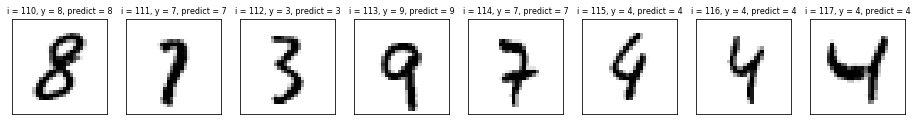

In [19]:
plot_images_labels_prediction(x_test_image, y_test_label, prediction, start_index = 110)
print()

In [20]:
print('Process ended.', '\n')

Process ended. 

